In [1]:
pip install datasets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("scikit-learn/adult-census-income")
print(dataset)
# Save locally as CSV
dataset["train"].to_csv("adult_census_income_train.csv")

C:\Users\user name\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'],
        num_rows: 32561
    })
})


Creating CSV from Arrow format: 100%|█████████████████████████████████████████████████| 33/33 [00:00<00:00, 107.33ba/s]


3551168

In [3]:
import pandas as pd 
import numpy as np
df=dataset['train'].to_pandas()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
#Replace '?' with NaN
df.replace("?",np.nan,inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
#Handle missing values

df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [9]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [11]:
#Trim whitespace from strings
for col in df.select_dtypes(include='object'):
    df[col]=df[col].str.strip()
    

In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
num_cols=df.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [14]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [15]:
df.duplicated().sum()

np.int64(24)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df[num_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
print(df['age'].sort_values())

28746    17
18810    17
15815    17
18816    17
4410     17
         ..
13123    90
1739     90
1742     90
17603    90
20621    90
Name: age, Length: 32537, dtype: int64


In [20]:
print(df['capital.gain'].max())

99999


In [21]:
print(df['income'].dtype)


object


In [22]:
print(df['income'].unique())


['<=50K' '>50K']


In [23]:
# Remove whitespace
df['income'] = df['income'].str.strip()

# Map to numeric
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# 3️⃣ Check
print(df['income'].value_counts())


income
0    24698
1     7839
Name: count, dtype: int64


In [24]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [25]:


# Check capital columns
print(df[['capital.gain','capital.loss']].head(10))

# Create capital_diff
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
print(df[['capital.gain','capital.loss','capital_diff']].head(10))


   capital.gain  capital.loss
0             0          4356
1             0          4356
2             0          4356
3             0          3900
4             0          3900
5             0          3770
6             0          3770
7             0          3683
8             0          3683
9             0          3004
   capital.gain  capital.loss  capital_diff
0             0          4356         -4356
1             0          4356         -4356
2             0          4356         -4356
3             0          3900         -3900
4             0          3900         -3900
5             0          3770         -3770
6             0          3770         -3770
7             0          3683         -3683
8             0          3683         -3683
9             0          3004         -3004


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


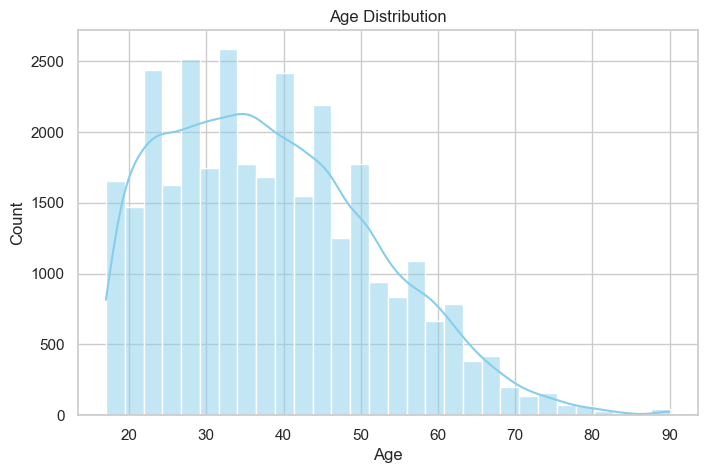

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


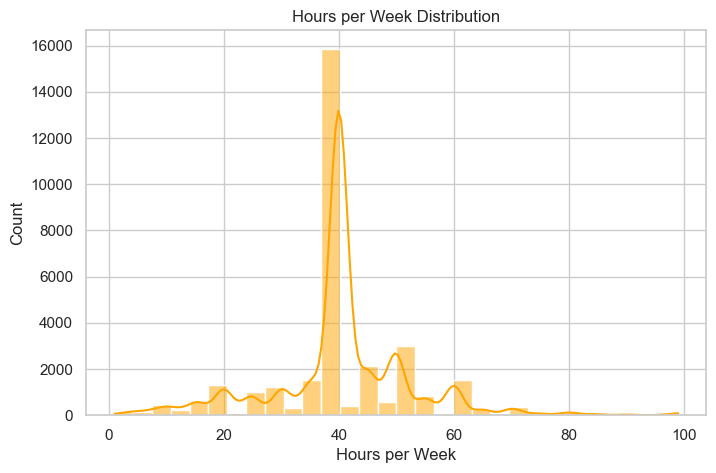

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['hours.per.week'], bins=30, kde=True, color='orange')
plt.title("Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()



Most individuals work around 40 hours per week, which is the standard full-time workweek.

There are small peaks at 20 hours, likely representing part-time workers.

A few individuals work extremely high hours (60–80 per week), which may indicate overtime or unusual cases.

The distribution is right-skewed, with a long tail towards higher working hours.

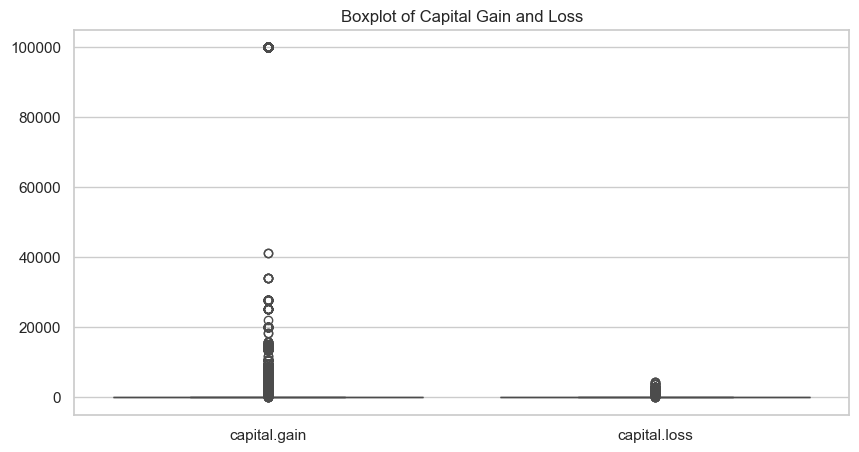

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['capital.gain','capital.loss']])
plt.title("Boxplot of Capital Gain and Loss")
plt.show()


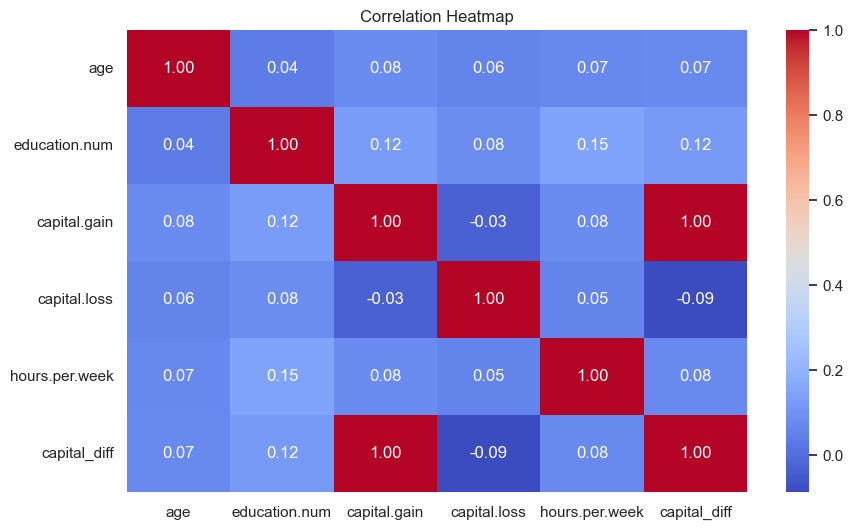

In [30]:
plt.figure(figsize=(10,6))
corr = df[['age','education.num','capital.gain','capital.loss','hours.per.week','capital_diff']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


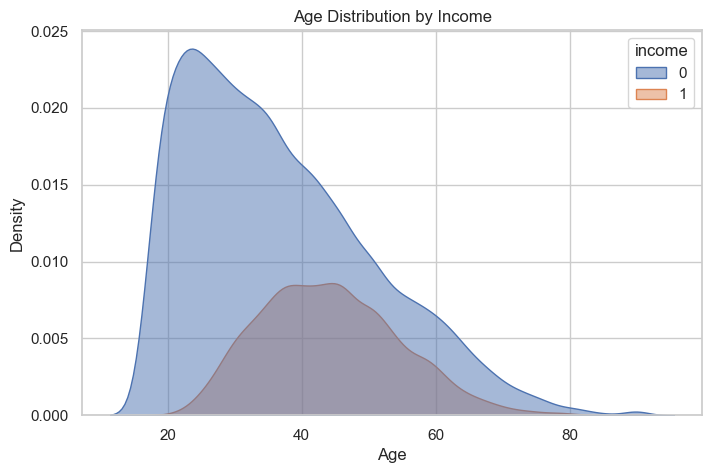

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age', hue='income', fill=True, alpha=0.5)
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


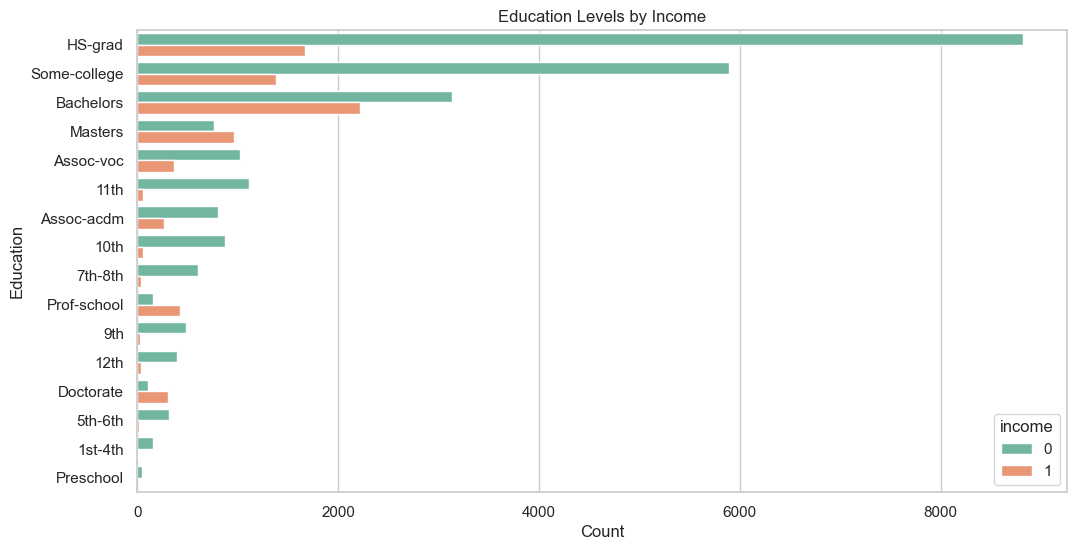

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(y='education', data=df, hue='income', palette='Set2', order=df['education'].value_counts().index)
plt.title("Education Levels by Income")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()


C:\Users\user name\AppData\Local\Temp\ipykernel_6756\3982275541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index, palette='pastel')


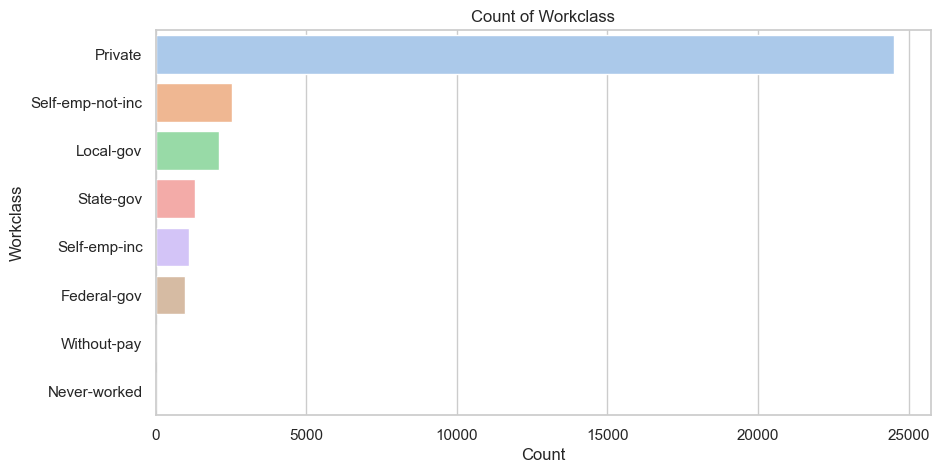

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index, palette='pastel')
plt.title("Count of Workclass")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()


In [34]:
df['capital_total'] = df['capital.gain'] + df['capital.loss']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_diff,capital_total
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,-4356,4356
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,-4356,4356
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,-4356,4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,-3900,3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,-3900,3900


In [35]:
df['edu_hours'] = df['education.num'] * df['hours.per.week']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_diff,capital_total,edu_hours
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,-4356,4356,360
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,-4356,4356,162
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,-4356,4356,400
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,-3900,3900,160
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,-3900,3900,400


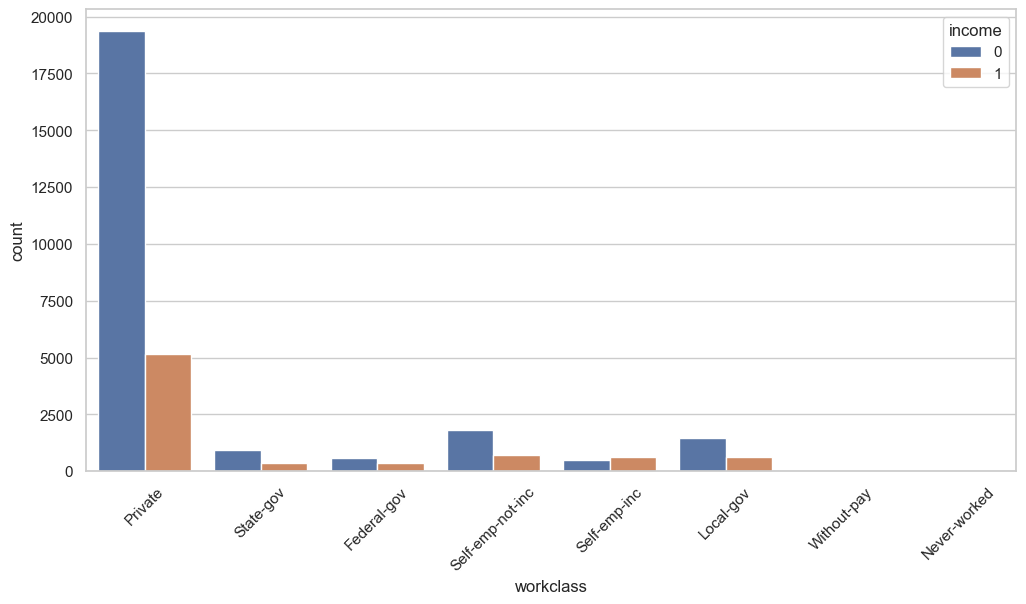

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='income', data=df)
plt.xticks(rotation=45)
plt.show()


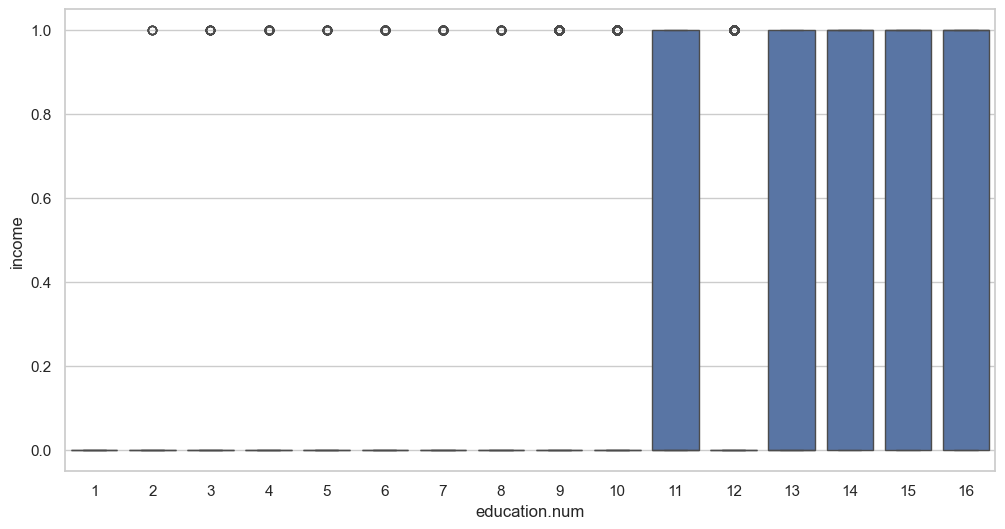

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='education.num', y='income', data=df)
plt.show()


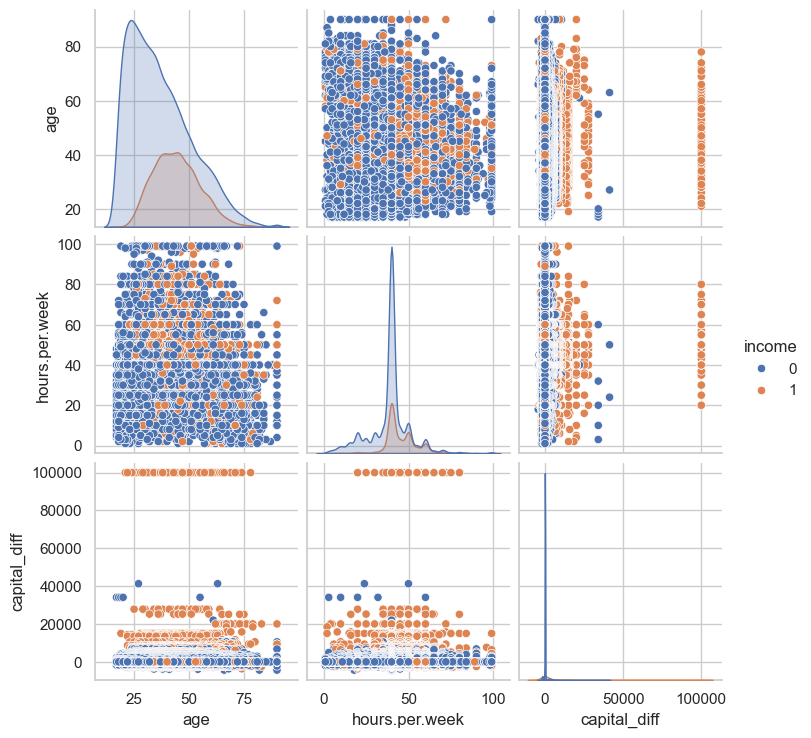

In [38]:
sns.pairplot(df[['age','hours.per.week','capital_diff','income']], hue='income')
plt.show()


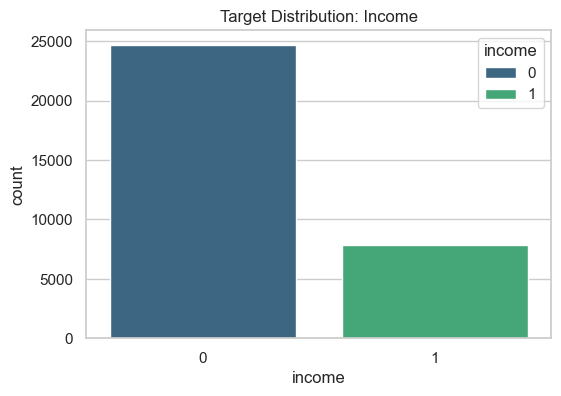

In [39]:
sns.set(style="whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df, hue="income", palette='viridis')
plt.title('Target Distribution: Income')
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

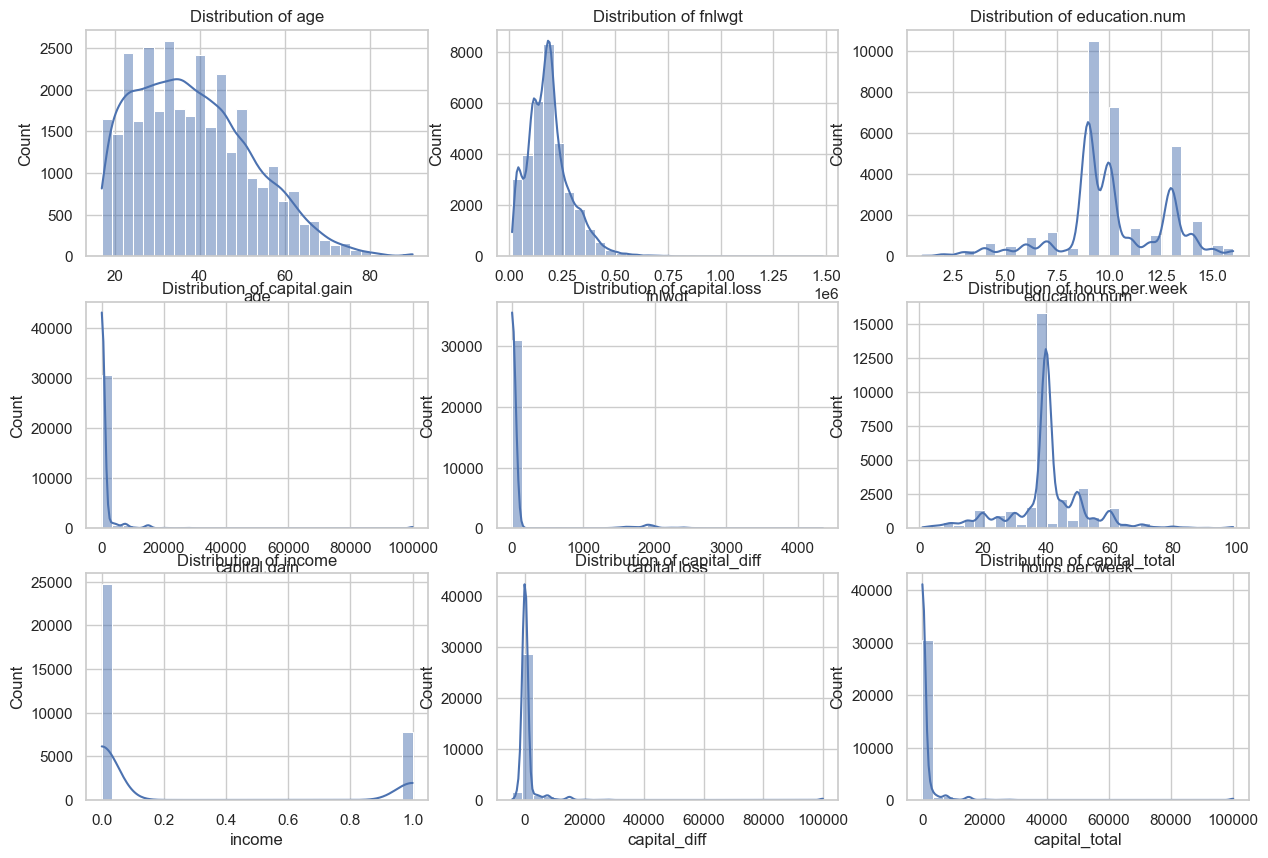

In [40]:
# 2. Numerical Distribution (Histograms)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Categorical Distribution
cat_cols = ['workclass', 'education', 'marital.status', 'relationship']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=col, palette='muted')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## Understanding IQR
** Outliers can skew statistical measures and ruin model performance (especially linear models).

** IQR: The difference between the 75th percentile (Q3) and the 25th percentile (Q1).

** Bounds: Lower = Q1 - 1.5IQR,
Upper = Q3 + 1.5IQR.

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
print(Q1)
print(Q3)

In [ ]:
# Focus on numerical columns that looked skewed on Day 1
focus_cols = ['age', 'hours.per.week', 'fnlwgt']

plt.figure(figsize=(15, 5))
for i, col in enumerate(focus_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.show()

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    print(f"Column: {column} | IQR: {IQR} | Lower: {lower_bound} | Upper: {upper_bound}")
   
    # Let's check how many outliers we have
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers identified: {len(outliers)}")

   
    # Strategy: Capping (Winsorizing)
    # We cap values to the upper and lower bounds instead of deleting rows (to preserve data)
   
    df_clean = df.copy()
    df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound,
                                np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column]))
   
    return df_clean



In [ ]:
# Apply to specific columns
# Let's apply it to 'hours.per.week' and 'age'
df = handle_outliers_iqr(df, 'hours.per.week')
df = handle_outliers_iqr(df, 'age')

# Visualize After Capping
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Age After Outlier Capping')


plt.subplot(1, 2, 2)
sns.boxplot(x=df['hours.per.week'])
plt.title('Hours/Week After Outlier Capping')
plt.show()

In [ ]:
df.shape

### Feature scaling -Normalization & Standardization 

In [ ]:
pip install scikit-learn


# Feature Scaling / Normalization — Why It Matters

## Without Scaling
When features are on very different scales (e.g., age vs. income):

- ❌ **Slow or failed convergence**
- ❌ **Biased feature importance**
- ❌ **Poor model performance**


---

## With Scaling
After scaling features to a similar range:

- ✅ **Faster training**
- ✅ **Better accuracy**
- ✅ **More stable gradients**
- ✅ **Fair feature contribution**

**Why?**  
All features contribute more evenly, helping gradient-based optimizers move efficiently toward the optimum.

## Simple Intuition
> **Normalization = “Put everything between 0 and 1”**

This prevents one feature from overpowering the others just because of its units.

---

## Common Scaling Methods

### 1. Min–Max Normalization
Scales values to \([0, 1]\)
$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$
Best when:
- You want a fixed range
- No extreme outliers

---

Best when:
- Data is roughly normal
- Using models like Logistic Regression, SVM, Linear Regression

---


Normalization (Min-Max Scaling): Scales data between 0 and 1. Good when data doesn't follow a Gaussian distribution.

Standardization (Z-Score Scaling): Scales data to have Mean=0 and Std Dev=1. Good when data follows a Gaussian distribution
or when algorithms assume it (Logistic Regression, SVM).

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Isolate numerical columns to scale
cols_to_scale = ['age', 'fnlwgt', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']

# 1. Standardization (Preferred for this dataset which has outliers/variance)
scaler_std = StandardScaler()

# Create a copy to keep original for comparison
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler_std.fit_transform(df[cols_to_scale])

In [ ]:
df_scaled

In [ ]:
# 2. Check the effect
print("Original Mean (Age):", df['age'].mean())
print("Scaled Mean (Age):", round(df_scaled['age'].mean(), 2)) # Should be 0
print("Scaled Std (Age):", round(df_scaled['age'].std(), 2))   # Should be 1

In [ ]:
# 2. Check the effect
print("Original Mean (Age):", df['age'].mean())
print("Scaled Mean (Age):", round(df_scaled['age'].mean(), 6)) # Should be 0
print("Scaled Std (Age):", round(df_scaled['age'].std(), 6))   # Should be 1

In [ ]:
print("max Value:",df_scaled['age'].max())
print("min Value:",df_scaled['age'].min())

In [ ]:
print("Original Mean(capital.gain):",df['capital.gain'].mean())
print("Scaled Mean (capital.gain):", round(df_scaled['capital.gain'].mean(), 6)) # Should be 0
print("Scaled Std (capital.gain):", round(df_scaled['capital.gain'].std(), 6))   # Should be 1

In [ ]:
print("Original Mean(education.num):",df['education.num'].mean())
print("Scaled Mean (education.num):", round(df_scaled['education.num'].mean(), 6)) # Should be 0
print("Scaled Std (education.num):", round(df_scaled['education.num'].std(), 6))   # Should be 1

In [ ]:
df.columns

In [ ]:
print("Original Mean(hours.per.week):",df['hours.per.week'].mean())
print("Scaled Mean (hours.per.week):", round(df_scaled['hours.per.week'].mean(), 6)) # Should be 0
print("Scaled Std (hours.per.week):", round(df_scaled['hours.per.week'].std(), 6))   # Should be 1

In [ ]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['age'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (Age)')

# After
sns.kdeplot(df_scaled['age'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (Age)')
plt.show()

In [ ]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['capital.gain'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (Age)')

# After
sns.kdeplot(df_scaled['capital.gain'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (capital.gain)')
plt.show()

In [ ]:
df['capital.gain'].max()

In [ ]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['hours.per.week'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (hours_per_week)')

# After
sns.kdeplot(df_scaled['hours.per.week'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (hours_per_week)')
plt.show()

In [ ]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['education.num'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (education_num)')

# After
sns.kdeplot(df_scaled['education.num'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (education_num)')
plt.show()

## 1️⃣ Nominal Data (Name only)

### What it is:
- Categories with **no natural order or ranking**
- Numbers (if used) are just **labels**, not values
- You **cannot** say one category is greater than another

### Examples:
- Gender: Male, Female  
- Color: Red, Blue, Green  
- Country: India, USA, UK  
- Marital Status: Single, Married  

### Key point:
- **Order does not matter**

### Common encoding:
✔ **One-Hot Encoding**

---

## 2️⃣ Ordinal Data (Ordered categories)

### What it is:
- Categories with a **meaningful order**
- **Unequal or unknown spacing** between levels
- You know the ranking
- You don’t know the exact difference between ranks

### Examples:
- Education level: High School < Bachelor < Master < PhD  
- Satisfaction: Low < Medium < High  
- Movie ratings: Poor < Average < Good < Excellent  

### Key point:
- **Order matters, but differences are not measurable**

### Common encoding:
✔ **Label Encoding** (or custom mapping)

---

## 3️⃣ Discrete Data (Countable numbers)

### What it is:
Numerical values that:
- Are **countable**
- Take **separate, distinct values**
- Are usually **whole numbers**

### Examples:
- Number of children: 0, 1, 2, 3  
- Number of cars owned  
- Number of students in a class  
- Dice outcomes: 1–6  

### Key point:
- **You can count them; no fractions in between**

---

## 4️⃣ Continuous Data (Measurable quantities)

### What it is:
Numerical values that:
- Can take **any value within a range**
- Include **decimals and fractions**

### Examples:
- Height: 170.5 cm  
- Weight: 65.2 kg  
- Temperature: 36.6 °C  
- Salary, Time, Distance  

### Key point:
- **Infinite possible values within a range**

## Encoding Strategies

### 🔢 Label Encoding
- Assigns a **unique integer** to each category  
- Best used for **ordinal data**, where order or rank matters  
  - Examples: `Low < Medium < High`, `Poor < Average < Good`
- Also commonly used for the **target (label) variable**

**Example:**
- Low → 0  
- Medium → 1  
- High → 2  

---

### 🧩 One-Hot Encoding
- Creates **separate binary (0/1) columns** for each category  
- Best used for **nominal data**, where no natural order exists  
  - Examples: `Red`, `Blue`, `Green`
- Prevents models from assuming a false ranking between categories

**Example:**
| Color | Red | Blue | Green |
|------|-----|------|-------|
| Red  | 1   | 0    | 0     |
| Blue | 0   | 1    | 0     |
| Green| 0   | 0    | 1     |


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding the Target Variable
le = LabelEncoder()
df['income_encoded'] = le.fit_transform(df['income'])

print("Target Encoding Mapping:")
for i, item in enumerate(le.classes_):
    print(f"{item} --> {i}")

# Drop original income column
df.drop('income', axis=1, inplace=True)

In [ ]:
df

In [ ]:
# 2. One-Hot Encoding for Nominal Features
# Nominal: Workclass, Marital Status, Occupation, Relationship, Race, Sex
nominal_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']

# Using Pandas get_dummies (easiest for EDA phase)
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print(f"Shape after One-Hot Encoding: {df_encoded.shape}")

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df_encoded['native.country'].value_counts()

In [ ]:
df_encoded['native.country'].nunique()

In [ ]:
df_encoded.drop('education',axis=1,inplace=True)

In [ ]:
df_encoded

In [ ]:
df_encoded.drop('native.country',axis=1,inplace=True)

In [ ]:
df_encoded

In [ ]:
df=df_encoded
print(type(df))

## Feature Engineering & Selection

### 🔧 Feature Engineering
- **Definition:** Creating new columns or features from existing data to better represent the underlying problem.
- **Purpose:** Helps models capture important patterns and relationships that may not be obvious in the raw data.
- **Example:**  
  ```text
  Net Capital = capital.gain - capital.loss


In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
# 2. Check Correlation
plt.figure(figsize=(20, 15))
# Calculate correlation only on numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# 3. Feature Selection based on Correlation with Target
target_corr = corr_matrix['income_encoded'].sort_values(ascending=False)
print("\nTop 10 features correlated with Income (>50K):")
print(target_corr.head(10))

In [ ]:
# Drop columns with extremely low correlation (optional noise reduction)
# keeping features with abs(correlation) > 0.01
relevant_features = target_corr[abs(target_corr) > 0.01].index.tolist()
df_final = df[relevant_features]
print(f"\nReduced feature set from {df.shape[1]} to {df_final.shape[1]}")

In [ ]:
df_final.head()

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate Features (X) and Target (y)
X = df_final.drop('income_encoded', axis=1)
y = df_final['income_encoded']

# 2. Split
# stratify=y ensures the proportion of >50k and <=50k is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Splitting Complete:")
print(f"Training Set: {X_train.shape}")
print(f"Test Set: {X_test.shape}")

# 3. Save processed data (Optional)
# X_train.to_csv('X_train_processed.csv', index=False)

In [ ]:
 X_train.to_csv('X_train_processed.csv', index=False)


In [ ]:
X_test.to_csv('X_test_processed.csv', index=False)

In [ ]:
y_train.to_csv('y_train_processed.csv', index=False)

In [ ]:
y_test.to_csv('y_train_processed.csv', index=False)

In [ ]:
percent_zero = (df_final['income_encoded'] == 0).mean() * 100
print(f"Zero percentage: {percent_zero:.2f}%")
